In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [502]:
#load bike dataset
bike_201701_201806 = pd.read_csv('공공자전거 대여소별 이용정보_201701_201806.csv', encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201807_201811 = pd.read_csv("공공자전거 대여소별 이용정보_201807_11.csv", encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201812_202101 = pd.read_csv('공공자전거 대여소별 이용정보_201812_202101.csv', encoding='cp949',
                                 names=['group', 'spot', 'date', 'rental'],  header=None)


In [434]:
#NaN이 있는 행 삭제
bike_201812_202101 = bike_201812_202101.dropna()

In [435]:
# date / data type cleaning
arrange_date1 = []
for i in bike_201701_201806['date']:
    arrange_date1.append(str(i)[1:5]+'-' + str(i)[5:7])
bike_201701_201806['date'] = arrange_date1

arrange_date2 = []
for i in bike_201812_202101['date']:
    arrange_date2.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201812_202101['date'] = arrange_date2

arrange_date3 = []
for i in bike_201807_201811['date']:
    arrange_date3.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201807_201811['date'] = arrange_date3

arrange_rental = []
for i in bike_201807_201811['rental']:
    arrange_rental.append(int(float(i)))
bike_201807_201811['rental'] = arrange_rental

In [436]:
#df 만들기
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
bike = pd.concat([date, total_rental], axis = 1)

#date로 groupby
bike_bydate = bike.groupby('date').sum()


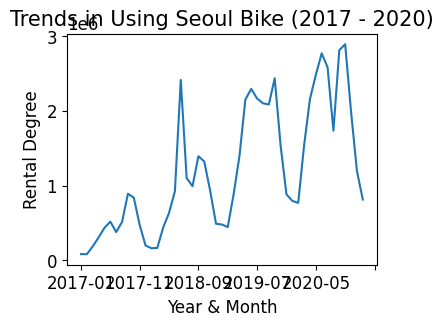

In [437]:
#plot1 - 따릉이 이용 건수 (추이) 파악
plt.figure()
bike_bydate['rental'].plot(kind='line')
plt.title("Trends in Using Seoul Bike (2017 - 2020)", fontsize = 15)
plt.xlabel('Year & Month')
plt.ylabel('Rental Degree')
plt.show()
plt.close("all")

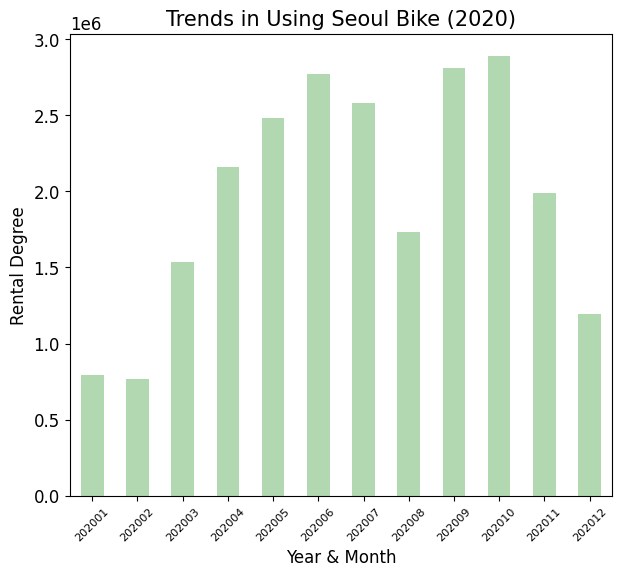

In [438]:
#plot2 - 2020 한정 따릉이 이용 건수
arrange_date4 = []
for i in bike['date']:
    arrange_date4.append(int(float(str(i)[:4]+ str(i)[5:7])))
bike['date'] = arrange_date4

bike_2020 = bike[(bike['date'] >= 202001) & (bike['date'] != 202101)]
bike_by2020 = bike_2020.groupby('date').sum()

plt.figure(figsize=(7,6))
bike_by2020['rental'].plot(kind='bar', color = 'green', alpha = 0.3)
plt.title("Trends in Using Seoul Bike (2020)", fontsize = 15)
plt.xlabel('Year & Month')
plt.ylabel('Rental Degree')
plt.xticks(fontsize = 8, rotation = 45)
plt.show()
plt.close("all")


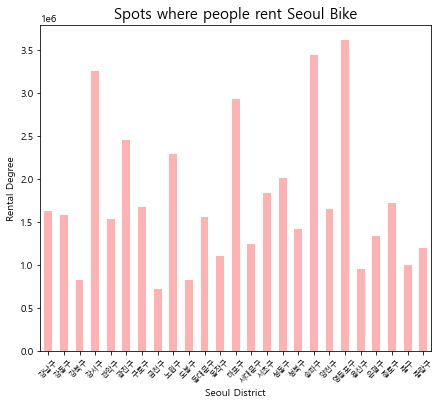

In [247]:
#plot3 - 2020 한정 따릉이 이용 건수 (group)

newbike = bike_201812_202101[(bike_201812_202101.group != '그룹명 없음') & (bike_201812_202101.group != '정비센터')]
newbike_bygroup = newbike.groupby('group').sum()


#plot 3-1. 구별 bar 그래프
plt.figure(figsize=(7,6))
plt.rcParams['font.family'] = 'Malgun Gothic'
newbike_bygroup['rental'].plot(kind='bar', color = 'red', alpha = 0.3)
plt.title("Spots where people rent Seoul Bike", fontsize = 15)
plt.xlabel('Seoul District')
plt.ylabel('Rental Degree')
plt.xticks(fontsize = 7.5, rotation = 45)
plt.show()
plt.close("all")

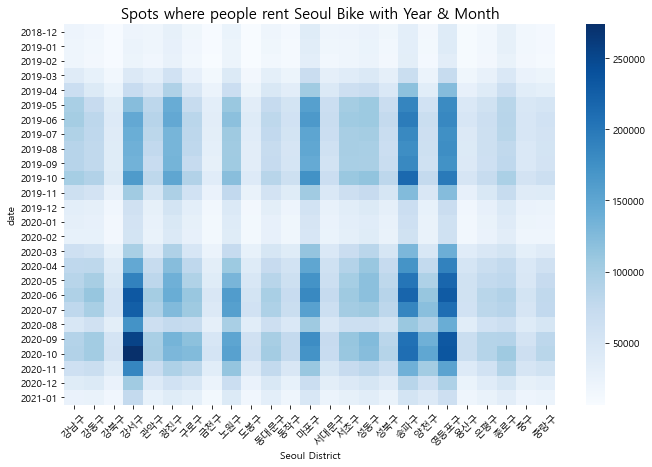

In [248]:
#plot 3-2. heatmap
pivot = newbike.pivot_table(index='date', columns='group', values='rental', aggfunc = 'sum')
plt.figure(figsize=(11, 7))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(pivot, cmap='Blues')
plt.xlabel('Seoul District')
plt.xticks(rotation = 45)
plt.title("Spots where people rent Seoul Bike with Year & Month", fontsize = 15)
plt.show()

In [370]:
#About top3 (강서, 송파, 영등포구)
gangseo = newbike[newbike.group == '강서구']
songpa = newbike[newbike.group == '송파구']
yeongdeungpo = newbike[newbike.group == '영등포구']

gangseo_by = gangseo.groupby('spot').sum()
songpa_by = songpa.groupby('spot').sum()
yeongdeungpo_by = yeongdeungpo.groupby('spot').sum()

print("==================================")
print('<The most rented place in Gangseo-gu>', gangseo_by[gangseo_by['rental'] == max(gangseo_by['rental'])])
print('<The most rented place in Songpa-gu>', songpa_by[songpa_by['rental'] == max(songpa_by['rental'])])
print('<The most rented place in Yeongdeungpo-gu>', yeongdeungpo_by[yeongdeungpo_by['rental'] == max(yeongdeungpo_by['rental'])])
print("==================================")

<The most rented place in Gangseo-gu>                        rental
spot                         
2701. 마곡나루역 5번출구 뒤편  119753.0
<The most rented place in Songpa-gu>                            rental
spot                             
1210. 롯데월드타워(잠실역2번출구 쪽)  140370.0
<The most rented place in Yeongdeungpo-gu>                      rental
spot                       
207. 여의나루역 1번출구 앞  237293.0


In [298]:
arrange_spot1 = []
for i in gangseo['spot']:
    arrange_spot1.append(str(i)[:4])
gangseo['spot_num'] = arrange_spot1

arrange_spot2 = []
for i in songpa['spot']:
    arrange_spot2.append(str(i)[:4])
songpa['spot_num'] = arrange_spot2

arrange_spot3 = []
for i in yeongdeungpo['spot']:
    arrange_spot3.append(str(i)[:3])
yeongdeungpo['spot_num'] = arrange_spot3

<ipython-input-298-0030807dc331>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangseo['spot_num'] = arrange_spot1
<ipython-input-298-0030807dc331>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songpa['spot_num'] = arrange_spot2
<ipython-input-298-0030807dc331>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [299]:
del bike_spot['Unnamed: 3']

KeyError: 'Unnamed: 3'

In [300]:
del bike_spot['Unnamed: 8']

KeyError: 'Unnamed: 8'

In [301]:
del bike_spot['운영\n방식']

KeyError: '운영\n방식'

In [302]:
del bike_spot['설치형태']

KeyError: '설치형태'

In [303]:
bike_spot = bike_spot.dropna(how='all')

In [304]:
bike_spot = bike_spot.drop(index=1)

KeyError: '[1] not found in axis'

In [305]:
bike_spot.columns = ['spot_num', 'spot', 'location', 'latitude','longitude','date']
bike_spot.head()

,spot_num,spot,location,latitude,longitude,date
4,301,경복궁역 7번출구 앞,종로구,37.575794,126.971451,2015-10-07
5,302,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,2015-10-07
6,303,광화문역 1번출구 앞,종로구,37.571770,126.974663,2015-10-07
7,304,광화문역 2번출구 앞,종로구,37.572113,126.977577,2021-01-26
8,305,종로구청 옆,종로구,37.572582,126.978355,2015-10-07


In [306]:
spot_arrange = []
for i in bike_spot['spot_num']:
    spot_arrange.append(int(float(i)))
bike_spot['spot_num'] = spot_arrange

In [307]:
bike_spot.head()

,spot_num,spot,location,latitude,longitude,date
4,301,경복궁역 7번출구 앞,종로구,37.575794,126.971451,2015-10-07
5,302,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,2015-10-07
6,303,광화문역 1번출구 앞,종로구,37.571770,126.974663,2015-10-07
7,304,광화문역 2번출구 앞,종로구,37.572113,126.977577,2021-01-26
8,305,종로구청 옆,종로구,37.572582,126.978355,2015-10-07


,group,spot,date,rental,spot_num
193,강서구,1101. 개화동상사마을종점 버스정류장,2018-12,28.0,1101
194,강서구,1102. 방화사거리 마을버스 버스정류장,2018-12,266.0,1102
195,강서구,1103. 방화역 4번출구앞,2018-12,232.0,1103
196,강서구,1105. 방화근린공원,2018-12,26.0,1105
197,강서구,1106. 신방화사거리,2018-12,232.0,1106
...,...,...,...,...,...
43501,강서구,3794. 안양천합수부(현대3차아파트),2021-01,228.0,3794
43502,강서구,3795. 공항신성빌딩 앞,2021-01,77.0,3795
43503,강서구,3796. 송정역 3번출구 앞,2021-01,86.0,3796
43504,강서구,3797. 마곡수명산파크7단지 710동 앞,2021-01,57.0,3797


In [308]:
str(bike['date'])

'0        201701\n1        201701\n2        201701\n3        201701\n4        201701\n          ...  \n68879    202101\n68880    202101\n68881    202101\n68882    202101\n68883    202101\nName: date, Length: 68884, dtype: int64'

In [309]:
with_spot = pd.merge(with_date, bike_spot, on = 'spot_num')

In [310]:
with_spot.head()

,date_x,rental_x,spot_num,spot_x,rental_y,spot_y,location,latitude,longitude,date_y
0,2018-06,2414176.0,101,101. (구)합정동 주민센터,832,(구)합정동 주민센터,마포구,37.549561,126.905754,2015-09-06
1,2018-07,1099953.0,101,101. (구)합정동 주민센터,725,(구)합정동 주민센터,마포구,37.549561,126.905754,2015-09-06
2,2018-08,991348.0,101,101. (구)합정동 주민센터,686,(구)합정동 주민센터,마포구,37.549561,126.905754,2015-09-06
3,2018-09,1392038.0,101,101. (구)합정동 주민센터,822,(구)합정동 주민센터,마포구,37.549561,126.905754,2015-09-06
4,2018-10,1322104.0,101,101. (구)합정동 주민센터,721,(구)합정동 주민센터,마포구,37.549561,126.905754,2015-09-06


In [311]:
with_spot = with_spot.groupby('spot_num').sum()

In [312]:
with_spot.head()

,rental_x,rental_y,latitude,longitude
spot_num,,,,
101,8152495.0,4296,225.297366,761.434524
102,8152495.0,15605,225.333894,761.463774
103,8152495.0,10816,225.329706,761.465010
104,8152495.0,9370,225.303774,761.489916
105,8152495.0,5994,225.300042,761.488950


In [313]:
gangseo = pd.merge(gangseo, bike_spot, on = 'spot_num')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [314]:
newbike_bygroup

,rental
group,
강남구,1635549.0
강동구,1588964.0
강북구,822310.0
강서구,3256705.0
관악구,1538923.0
광진구,2461949.0
구로구,1670652.0
금천구,721313.0
노원구,2295919.0


In [114]:
gangseo_by

,rental
spot,
1101. 개화동상사마을종점 버스정류장,4041.0
1102. 방화사거리 마을버스 버스정류장,30838.0
1103. 방화역 4번출구앞,32420.0
1105. 방화근린공원,7687.0
1106. 신방화사거리,34825.0
...,...
3794. 안양천합수부(현대3차아파트),228.0
3795. 공항신성빌딩 앞,77.0
3796. 송정역 3번출구 앞,86.0


In [315]:
arrange_spot1 = []
for i in gangseo['spot']:
    arrange_spot1.append(int(str(i)[:4]))
gangseo['spot_num'] = arrange_spot1

arrange_spot2 = []
for i in songpa['spot']:
    arrange_spot2.append(int(str(i)[:4]))
songpa['spot_num'] = arrange_spot2

arrange_spot3 = []
for i in yeongdeungpo['spot']:
    arrange_spot3.append(int(str(i)[:3]))
yeongdeungpo['spot_num'] = arrange_spot3

<ipython-input-315-4a7d5ad9d0aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangseo['spot_num'] = arrange_spot1
<ipython-input-315-4a7d5ad9d0aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songpa['spot_num'] = arrange_spot2
<ipython-input-315-4a7d5ad9d0aa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [137]:
gangseo.head()

,group,spot,date,rental,spot_num
193,강서구,1101. 개화동상사마을종점 버스정류장,2018-12,28.0,1101
194,강서구,1102. 방화사거리 마을버스 버스정류장,2018-12,266.0,1102
195,강서구,1103. 방화역 4번출구앞,2018-12,232.0,1103
196,강서구,1105. 방화근린공원,2018-12,26.0,1105
197,강서구,1106. 신방화사거리,2018-12,232.0,1106


In [316]:
gangseo_spot = pd.merge(gangseo, bike_spot, on = 'spot_num')

In [317]:
songpa_spot = pd.merge(songpa, bike_spot, on = 'spot_num')

In [318]:
yeongdeungpo_spot = pd.merge(yeongdeungpo, bike_spot, on = 'spot_num')

In [319]:
yeongdeungpo_spot = yeongdeungpo_spot.groupby('spot_num')['rental'].sum()

In [320]:
songpa_spot = songpa_spot.groupby('spot_num')['rental'].sum()

In [321]:
gangseo_spot = gangseo_spot.groupby('spot_num')['rental'].sum()

In [324]:
gangseo_spot = pd.merge(gangseo_spot, bike_spot, on = 'spot_num')
gangseo_spot.head()

,spot_num,rental,spot_x,location_x,latitude_x,longitude_x,date_x,spot_y,location_y,latitude_y,longitude_y,date_y,spot,location,latitude,longitude,date
0,1101,4041.0,개화동상사마을종점 버스정류장,강서구,37.581612,126.798599,2017-04-24,개화동상사마을종점 버스정류장,강서구,37.581612,126.798599,2017-04-24,개화동상사마을종점 버스정류장,강서구,37.581612,126.798599,2017-04-24
1,1102,30838.0,방화사거리 마을버스 버스정류장,강서구,37.573643,126.811806,2017-04-24,방화사거리 마을버스 버스정류장,강서구,37.573643,126.811806,2017-04-24,방화사거리 마을버스 버스정류장,강서구,37.573643,126.811806,2017-04-24
2,1103,32420.0,방화역 4번출구앞,강서구,37.577221,126.812195,2017-06-22,방화역 4번출구앞,강서구,37.577221,126.812195,2017-06-22,방화역 4번출구앞,강서구,37.577221,126.812195,2017-06-22
3,1105,7687.0,방화근린공원,강서구,37.581623,126.812653,2017-04-24,방화근린공원,강서구,37.581623,126.812653,2017-04-24,방화근린공원,강서구,37.581623,126.812653,2017-04-24
4,1106,34825.0,신방화사거리,강서구,37.573032,126.816452,2017-06-20,신방화사거리,강서구,37.573032,126.816452,2017-06-20,신방화사거리,강서구,37.573032,126.816452,2017-06-20


In [291]:
gangseogu = pd.DataFrame(gangseo_spot, columns = ['spot_num', 'rental'])
gangseogu.head()

,spot_num,rental
spot_num,,
1101.0,NaN,4041.0
1102.0,NaN,30838.0
1103.0,NaN,32420.0
1105.0,NaN,7687.0
1106.0,NaN,34825.0


In [294]:
songpa_spot = pd.merge(songpa_spot, bike_spot, on = 'spot_num')
songpa_spot.head()

,spot_num,rental,spot_x,location_x,latitude_x,longitude_x,date_x,spot_y,location_y,latitude_y,longitude_y,date_y,spot,location,latitude,longitude,date
0,1201.0,47671.0,가락시장역 3번 출구,송파구,37.493179,127.118546,2017-06-22,가락시장역 3번 출구,송파구,37.493179,127.118546,2017-06-22,가락시장역 3번 출구,송파구,37.493179,127.118546,2017-06-22
1,1203.0,47862.0,밀리아나2빌딩 앞,송파구,37.493729,127.120621,2017-05-26,밀리아나2빌딩 앞,송파구,37.493729,127.120621,2017-05-26,밀리아나2빌딩 앞,송파구,37.493729,127.120621,2017-05-26
2,1204.0,23323.0,거여역 3번출구,송파구,37.493343,127.144730,2017-06-28,거여역 3번출구,송파구,37.493343,127.144730,2017-06-28,거여역 3번출구,송파구,37.493343,127.144730,2017-06-28
3,1205.0,25562.0,종합운동장역 4번출구,송파구,37.510429,127.071373,2017-04-24,종합운동장역 4번출구,송파구,37.510429,127.071373,2017-04-24,종합운동장역 4번출구,송파구,37.510429,127.071373,2017-04-24
4,1206.0,33669.0,9호선종합운동장역 9번출구,송파구,37.511280,127.078239,2017-04-24,9호선종합운동장역 9번출구,송파구,37.511280,127.078239,2017-04-24,9호선종합운동장역 9번출구,송파구,37.511280,127.078239,2017-04-24


In [283]:
yeongdeungpo_spot = pd.merge(yeongdeungpo_spot, bike_spot, on = 'spot_num')

In [522]:
import folium

geo_content = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [523]:
map = folium.Map(location = [37.566345,126.977893], tiles = 'Stamen Terrain', zoom_start = 10)

In [524]:
m

In [528]:
folium.Choropleth(
    geo_data = geo_content,
    name = 'chorpleth',
    data = newbike_bygroup,
    columns = ['group', 'rental'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 0.4,
    line_opacity = 0.2,
).add_to(map)

map

In [338]:
newbike_bygroup['rental']

group
강남구     1635549.0
강동구     1588964.0
강북구      822310.0
강서구     3256705.0
관악구     1538923.0
광진구     2461949.0
구로구     1670652.0
금천구      721313.0
노원구     2295919.0
도봉구      822212.0
동대문구    1562105.0
동작구     1110756.0
마포구     2936908.0
서대문구    1247578.0
서초구     1834589.0
성동구     2015987.0
성북구     1417321.0
송파구     3447918.0
양천구     1651893.0
영등포구    3617813.0
용산구      950765.0
은평구     1334369.0
종로구     1718182.0
중구      1005251.0
중랑구     1195355.0
Name: rental, dtype: float64

In [339]:
pivot = newbike.pivot_table(index='date', columns='group', values='rental', aggfunc = 'sum')

In [343]:
newbike_bygroup

,rental
group,
강남구,1635549.0
강동구,1588964.0
강북구,822310.0
강서구,3256705.0
관악구,1538923.0
광진구,2461949.0
구로구,1670652.0
금천구,721313.0
노원구,2295919.0


In [345]:
practice= pd.DataFrame(newbike_bygroup, columns = ['group', 'rental'])

In [346]:
practice

,group,rental
group,,
강남구,NaN,1635549.0
강동구,NaN,1588964.0
강북구,NaN,822310.0
강서구,NaN,3256705.0
관악구,NaN,1538923.0
광진구,NaN,2461949.0
구로구,NaN,1670652.0
금천구,NaN,721313.0
노원구,NaN,2295919.0


In [501]:
pd.DataFrame({'rental':newbike.groupby('group').sum()})



ValueError: If using all scalar values, you must pass an index

In [499]:
newbike_bygroup.reset_index(level=['group'], inplace = True)


KeyError: 'Requested level (group) does not match index name (None)'

In [500]:
newbike_bygroup

,group,rental
0,강남구,1635549.0
1,강동구,1588964.0
2,강북구,822310.0
3,강서구,3256705.0
4,관악구,1538923.0
5,광진구,2461949.0
6,구로구,1670652.0
7,금천구,721313.0
8,노원구,2295919.0
9,도봉구,822212.0


In [374]:
covid

,일자,계(명),국내발생(명),해외유입(명),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,누적(명),"138,311","129,336","8,975",NaN,NaN,NaN,NaN
1,2020-01-20,1,0,1,NaN,NaN,NaN,NaN
2,2020-01-21,0,0,0,NaN,NaN,NaN,NaN
3,2020-01-22,0,0,0,NaN,NaN,NaN,NaN
4,2020-01-23,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
490,2021-05-23,585,570,15,NaN,NaN,NaN,NaN
491,2021-05-24,530,505,25,NaN,NaN,NaN,NaN
492,2021-05-25,516,481,35,NaN,NaN,NaN,NaN
493,2021-05-26,707,684,23,NaN,NaN,NaN,NaN


In [375]:
covid.names()

AttributeError: 'DataFrame' object has no attribute 'names'

In [503]:
covid = pd.read_csv('코로나바이러스감염증-19_확진환자_발생현황.csv', encoding = 'cp949')
covid = covid.drop(index=0)

In [504]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

ValueError: x and y must have same first dimension, but have shapes (68884,) and (12,)

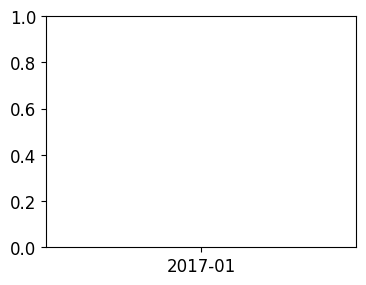

In [480]:
fig, ax1 = plt.subplots()

ax1.plot(date, bike_by2020['rental'], '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 10)
ax1.set_xlabel('Year')
ax1.set_ylabel('Patients')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(date, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel('')
ax2.tick_params(axis='y', direction='in')

plt.show()

In [505]:

arrange_date6 = []
for i in covid['일자']:
    arrange_date6.append(int(float(str(i)[:4]+ str(i)[5:7])))
covid['일자'] = arrange_date6


def remove_comma(x):
    return x.replace(',', '') 

covid['계(명)'] = covid['계(명)'].apply(remove_comma)

arrange = []
for i in covid['계(명)'] :
    arrange.append(int(float(i)))
covid['계(명)'] = arrange

covid_2020 = covid[(covid['일자'] >= 202001) & (covid['일자'] <= 202012)]
covid_by2020 = covid_2020.groupby('일자').sum()
covid_by2020.reset_index(level=['일자'], inplace = True)

In [506]:
covid_by2020.head()

,일자,계(명),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,202001,11,0.0,0.0,0.0,0.0
1,202002,2920,0.0,0.0,0.0,0.0
2,202003,6855,0.0,0.0,0.0,0.0
3,202004,979,0.0,0.0,0.0,0.0
4,202005,703,0.0,0.0,0.0,0.0


In [519]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.size'] = 8

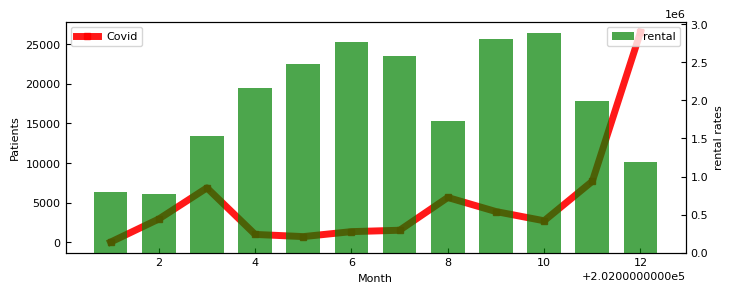

In [521]:
fig, ax1 = plt.subplots()

ax1.plot(covid_by2020['일자'], covid_by2020['계(명)'], '-s', color='red', markersize=4, linewidth=5, alpha=0.9, label='Covid')
ax1.set_ylim()
ax1.set_xlabel('Month')
ax1.set_ylabel('Patients')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(bike_by2020['date'],bike_by2020['rental'], color='green', label='rental', alpha=0.7, width=0.7)
ax2.set_ylim()
ax2.set_ylabel('rental rates')
ax2.tick_params(axis='y', direction='in')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [464]:
bike_by2020

bike_by2020 = bike_by2020.reset_index(level=['date'], inplace = True)


KeyError: 'Requested level (date) does not match index name (None)'

In [469]:
covid_by2020['일자']

KeyError: '일자'

In [466]:
bike_by2020['date']

0     202001
1     202002
2     202003
3     202004
4     202005
5     202006
6     202007
7     202008
8     202009
9     202010
10    202011
11    202012
Name: date, dtype: int64